In [4]:
pd.__version__

'2.3.1'

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')

# Q2 How many records in the dataset?

In [6]:
# how many records in the dataset
len(df)

2160

In [7]:
# how many rows & how many columns
df.shape

(2160, 12)

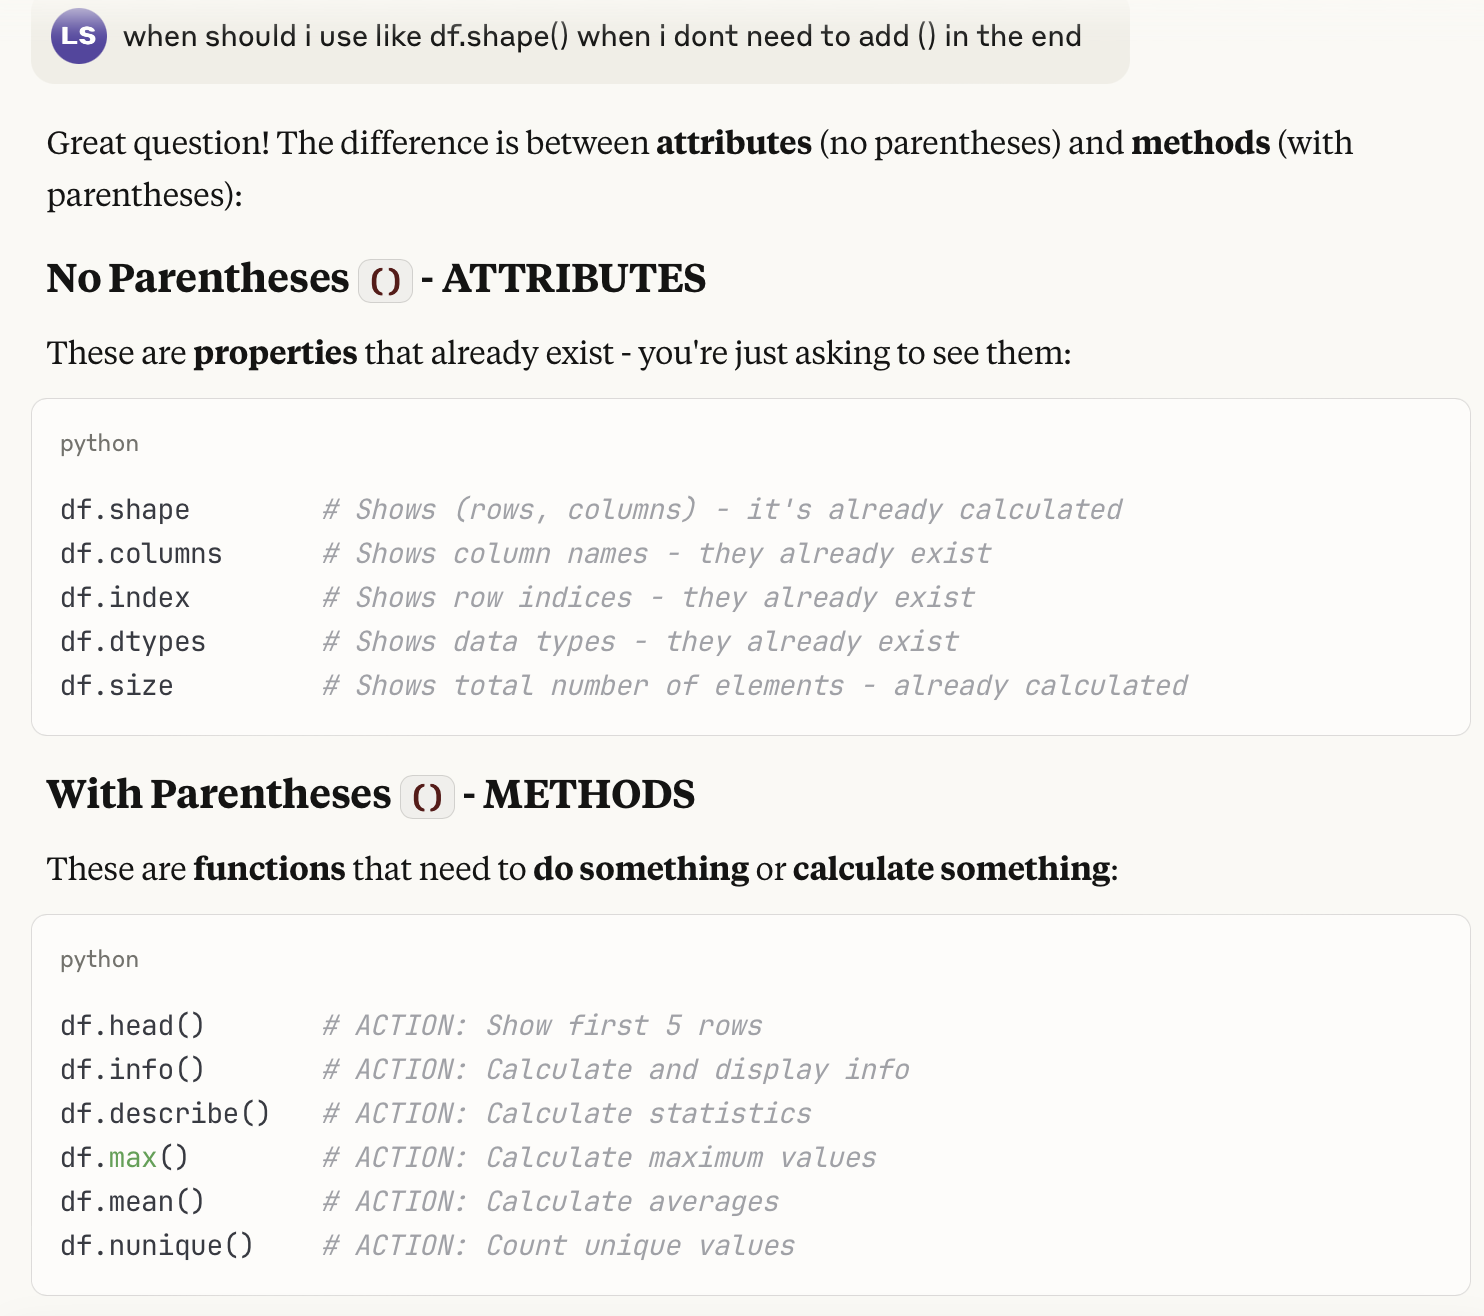

In [8]:
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


# Q3 How many unique values in one column?

In [9]:
# how many laptop brands are in the dataset
len(df.Brand.unique())

27

In [10]:
# brackets for columns - suitable for all kinds of column names
df['Brand'].nunique()

27

In [11]:
df.nunique()

Laptop          2160
Status             2
Brand             27
Model            121
CPU               28
RAM                9
Storage           12
Storage type       2
GPU               44
Screen            29
Touch              2
Final Price     1440
dtype: int64

# Q4 How many null values in each column? & how many columns containing null values?

In [12]:
# how many null values in each column
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [13]:
# how many columns containing null values
df.isnull().any().sum()

np.int64(3)

In [14]:
df.isnull().any().sum().tolist()

3

## Null/Zero/NaN percentage

In [15]:
# calculating null percentage in each column
df.isnull().sum()/len(df)*100

Laptop           0.000000
Status           0.000000
Brand            0.000000
Model            0.000000
CPU              0.000000
RAM              0.000000
Storage          0.000000
Storage type     1.944444
GPU             63.472222
Screen           0.185185
Touch            0.000000
Final Price      0.000000
dtype: float64

In [16]:
# the column list of high null columns
# df.columns[condition] returns a pandas Index object
# .tolist() converts it to a regular Python list
columns_high_null = df.columns[round(df.isnull().sum()/len(df) * 100, 0) >50].tolist()
columns_high_null

['GPU']

In [17]:
high_zero_percent = df.columns[(df==8).sum()/len(df)*100 > 20].tolist()
high_zero_percent

['RAM']

In [18]:
high_nan = df.columns[df.isna().sum()/len(df)*100 > 50].tolist()
high_nan

['GPU']

notes:
1. use df.columns[condition] for filtering on some conditions!!
2. use .tolist() to convert to a list, so you don't get unnecessary propertys for the columns
3.  df.isnull().sum() v.s (df==0).sum() --------- why df.isnull but not df.(df==0) ??? ----- 因为isnull是一个method， 作用在df上， 但是df==0是一个运算，df==0的结果就是另一个dataframe

# Q5 what's the max value of 'price' column for one specific brand in 'brand' column?

Notes:

1. df[condition] = "Give me rows that match"

2. df.columns[condition] = "Give me column names that match"

3. You can't use .[...] syntax - it should be [...]

4. Remember the pattern: Filter rows → Select column → Apply method!


In [23]:
# What's the maximum final price of Dell notebooks in the dataset?
df[df['Brand']== 'Dell']['Final Price'].max().tolist()

3936.0

# Q6 Median value of Screen